# 데이터 불러오기

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [116]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [117]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


`info()` 메서드를 통해 데이터의 개수, column의 이름, 결측치 여부를 확인 할 수 있다.

데이터의 개수는 1205개,

결측치는 없다.

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


# EDA & 전처리

## 중식계, 석식계 중심 EDA

Target인 중식계와 석식계를 중심으로 EDA를 진행 할 것이다.

우선 중식계 column을 시각화해보자

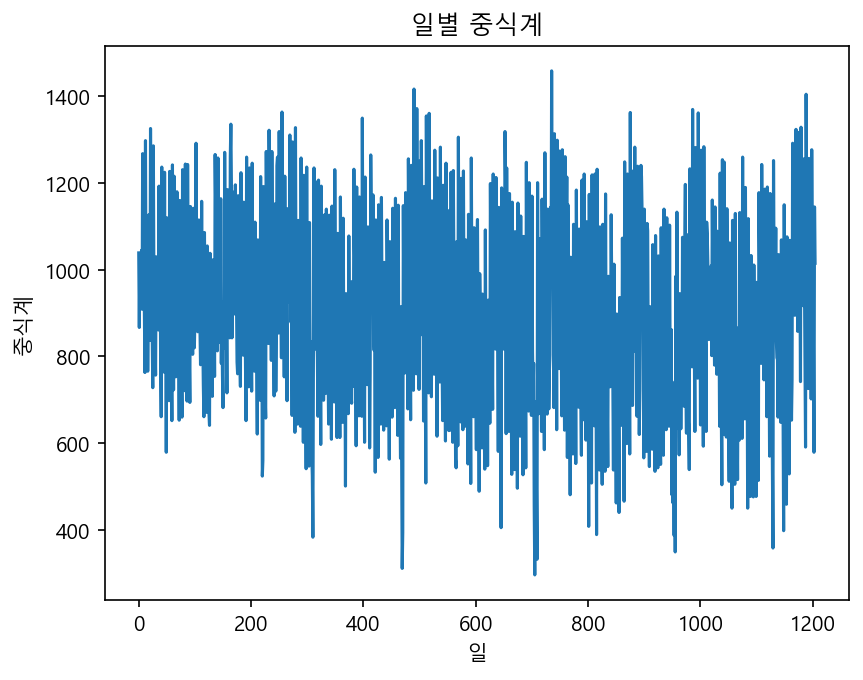

In [119]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(dpi=150)
plt.title("일별 중식계")
plt.xlabel('일')
plt.ylabel('중식계')
plt.plot(train.index, train['중식계'])
plt.show()

중식계의 값은 주로 800~1200 범위에 분포하고 있고 몇몇 선이 아래로 많이 뻗어나와있다. 중식계의 값이 눈에 띄게 적은 날인데, y 값이 500인 곳에 수평 선을 그려보자

hlines()는 수평 선을 그리는 함수이다.

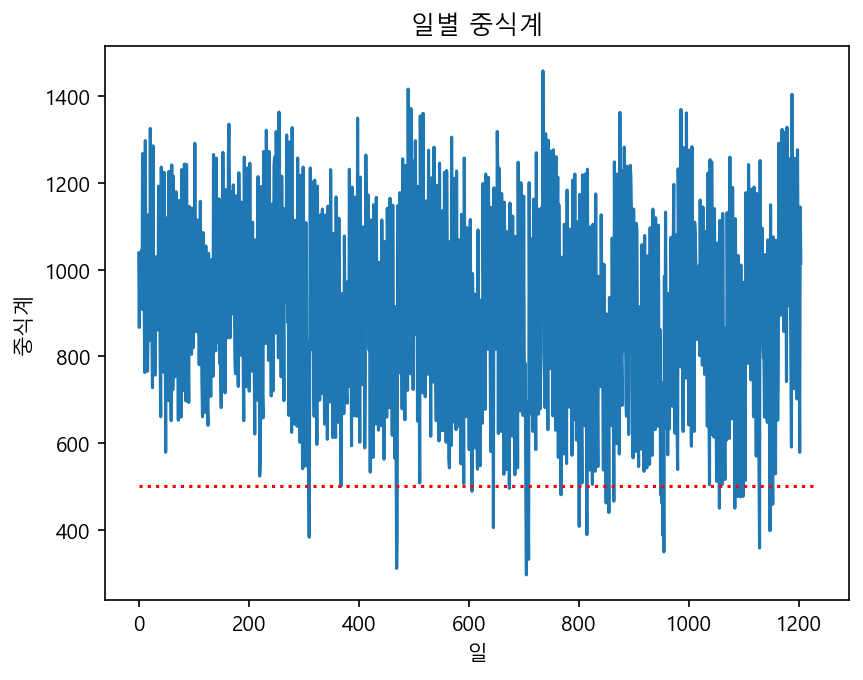

In [120]:
plt.figure(dpi=150)    
plt.title("일별 중식계")    
plt.xlabel('일')    
plt.ylabel('중식계')    
plt.plot(train.index, train['중식계'])    
plt.hlines(y=500, xmin=0, xmax=1230, color='red', linestyle='dotted')    
plt.show()

In [121]:
# 중식계 이상치 추출
train[train['중식계'] < 500].head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
310,2017-05-04,목,2637,1224,41,45,0.0,모닝롤/단호박샌드 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 시래기된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 들깨미역국 닭갈비 생선까스*타르소스 무생채 포기김...,야채볶음밥 (쌀:국내산) 유부주머니국 미니버거 야채비빔만두 스틱단무지/오렌지주...,383.0,262.0
469,2017-12-28,목,2665,240,260,55,0.0,모닝롤/치즈프레즐 우유/주스 스크램블에그 견과류죽/쌀밥 (쌀:국내산) 피바지락국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱된장국 돼지갈비찜 콩나물겨자채 참나물무침 포기...,쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스 크림스프 감자범벅/오이피클 과일샐러드 ...,311.0,245.0
470,2017-12-29,금,2665,489,242,5,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 냉이된장국 마늘...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 닭볶음탕 연근땅콩조림 파래김*양념 배추겉절...,쌀밥/잡곡밥 (쌀:국내산) 육개장 자반고등어구이 비엔나감자볶음 청경채무침 포...,394.0,209.0
606,2018-07-20,금,2704,273,291,49,0.0,모닝롤/고구마파이 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 대구찌개 오이...,쌀밥/잡곡밥 (쌀:국내산) 우무콩국 유자청제육볶음 통도라지구이 호박잎*양배추쌈...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 돈육간장강정 두부구이 아몬드멸치볶음 포기김...,489.0,394.0
645,2018-09-14,금,2763,174,313,132,0.0,모닝롤/크로와상 우유/주스 계란후라이 해물죽/쌀밥 (쌀:국내산) 선지해장국 멸치...,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 언양식불고기 계란말이 상추파무침 포기김...,쌀밥/잡곡밥 (쌀:국내산) 도토리묵냉국 해물누룽지탕 동그랑땡전 도라지무침 포...,405.0,375.0
674,2018-11-09,금,2815,185,302,38,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 근대국 카레감자...,쌀밥/잡곡밥 (쌀:국내산) 육개장 고등어구이 비엔나케찹볶음 연근조림 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 쇠고기장조림 메밀전병만두 오이무침 포기...,496.0,454.0
704,2018-12-21,금,2846,175,261,163,0.0,모닝롤/단팥빵 우유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 북어계란국 톳두...,쌀밥/잡곡밥 (쌀:국내산) 닭개장 갈치양념조림 고기전 비트무생채 포기김치 (...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 생선까스*탈탈소스 마파두부 콩나물무침 ...,456.0,456.0
705,2018-12-24,월,2846,894,159,26,0.0,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물김치국...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 훈제오리구이 매운어묵볶음 쌈무/부추생채 ...,쌀밥/잡곡밥 (쌀:국내산) 민물새우찌개 닭갈비 버섯잡채 오이무침 포기김치 (...,296.0,104.0
708,2018-12-28,금,2846,315,264,18,0.0,모닝롤/카스텔라 우유/주스 계란후라이 양송이죽/쌀밥 (쌀:국내산) 대구매운탕 검...,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 버섯불고기 해물동그랑땡 유채나물 포기김...,쌀밥/잡곡밥 (쌀:국내산) 육개장 코다리조림 꽃맛살볶음 견과류조림 포기김치 ...,491.0,406.0
709,2018-12-31,월,2846,1085,132,28,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 단배추...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 돈육고추장불고기 (돼지고기:국내산) 감자채볶음...,쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국 훈제오리볶음 계란찜 참나물생채 포기김...,332.0,135.0


위 데이터를 확인해보면, 본사정원수에 비해 본사휴가자수가 많아보인다.

중식계의 값 이상치와 이상치가 아닌 데이터 즉, 중식계의 값이 적은 날과 적지 않은 날의 본사휴가자수 평균을 비교해보는 것이 필요하다.

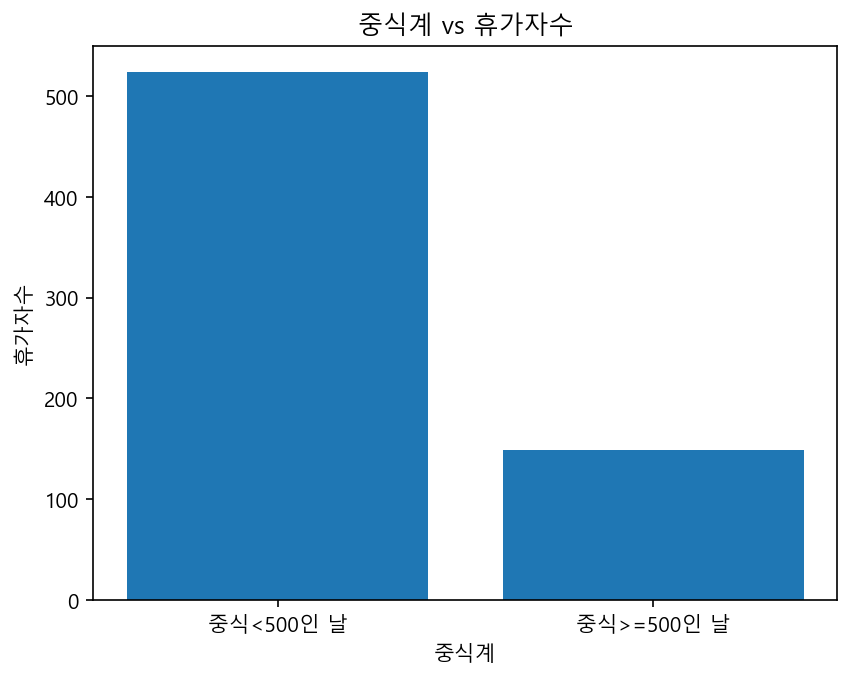

In [122]:
x = ['중식<500인 날', '중식>=500인 날']
y = [train[train['중식계'] < 500]['본사휴가자수'].mean(), train[train['중식계'] >= 500]['본사휴가자수'].mean()]

plt.figure(dpi=150)
plt.title("중식계 vs 휴가자수")
plt.xlabel('중식계')
plt.ylabel('휴가자수')
plt.bar(x, y)
plt.show()

중식계 < 500인 날의 휴가자 수 평균이 > 500 인 날의 휴가자 수 평균보다 3배 이상이다.

휴가자 수 변화는 중식계에 영향을 준다고 말할 수 있겠고 따라서 본사휴가자수는 모델에 포함시킬 경우 중식계를 예측하는 데에 유의미한 결론을 도출할 수 있을 것이다.

이제 석식계를 시각화해보자

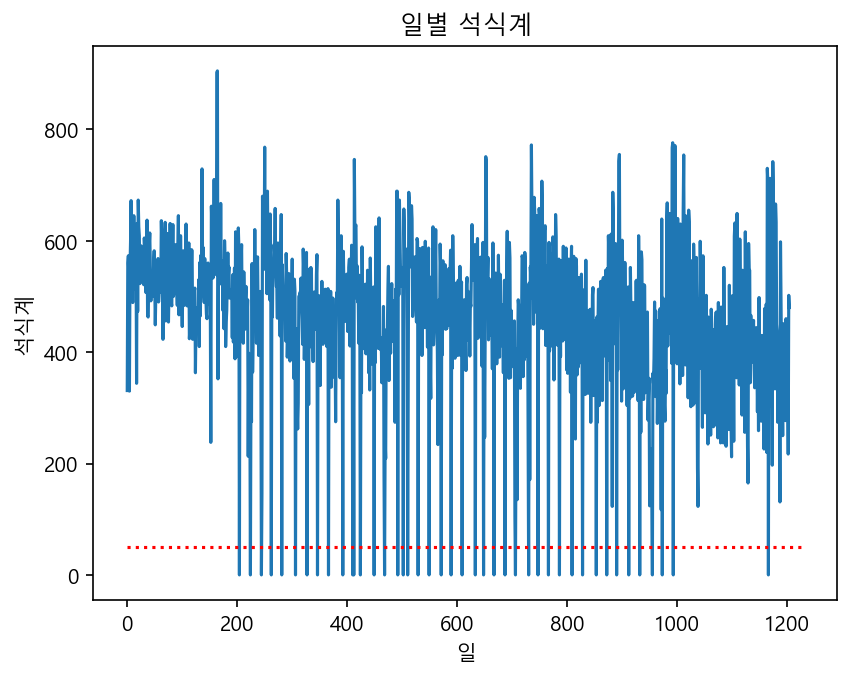

In [123]:
plt.figure(dpi=150)    
plt.title("일별 석식계")    
plt.xlabel('일')    
plt.ylabel('석식계')    
plt.plot(train.index, train['석식계'])    
plt.hlines(y=50, xmin=0, xmax=1230, color='red', linestyle='dotted')    
plt.show()

In [124]:
# 석식계 이상치 추출
train[train['석식계'] == 0].head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


석식계의 값이 0일때 석식 메뉴가 존재하지 않는다. 자기계발의날, 가정의날 등으로 표기되어 있는 것으로 보아 구내식당에서 석식을 제공하지 않는 날이 있는 것으로 보인다.

대부분 수요일에 석식이 제공되지 않는다.

그리고 위 석식계 시각화 그래프를 잘 보면 일정한 주기로 반복적인 패턴이 나타나는 것을 볼 수 있다.

이 데이터는 일자가 순차적으로 배열된 데이터로 시계열 데이터이다.

석식계는 일자정보와 연관이 있을 것으로 보인다.

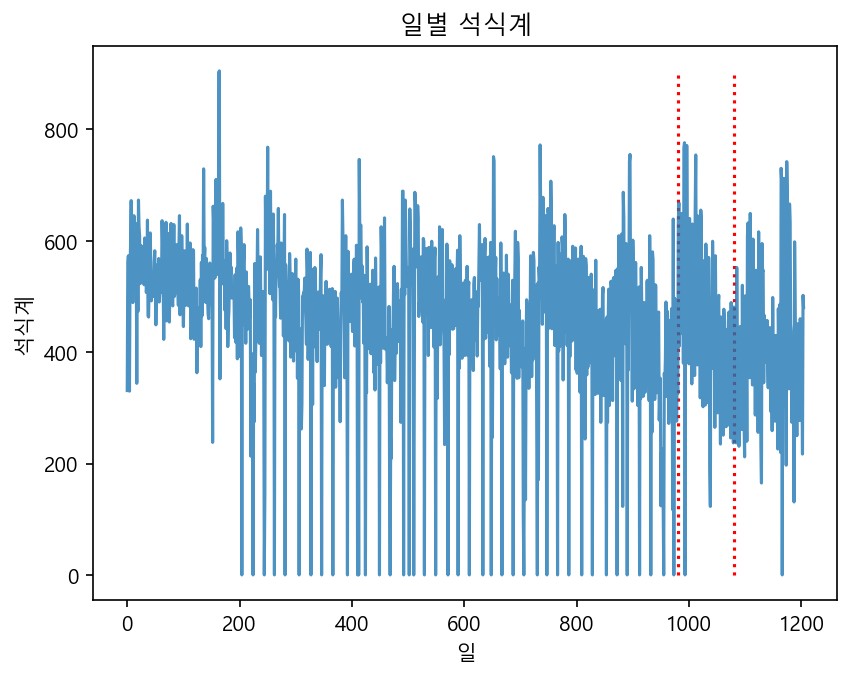

In [125]:
# 석식계 패턴 시각화

plt.figure(dpi=150)
plt.title("일별 석식계")
plt.xlabel('일')
plt.ylabel('석식계')

# 석식계가 높은 지점
plt.vlines(x=980, ymin=0, ymax=900, color='red', linestyle='dotted')

# 석식계가 낮은 지점
plt.vlines(x=1080, ymin=0, ymax=900, color='red', linestyle='dotted')
plt.plot(train.index, train['석식계'], alpha=0.8)
plt.show()

빨간 수직선으로 구분된 구간을 기준으로 반복적인 패턴이 보인다. 

이 구간을 기준으로 앞뒤를 살펴보면 특정 일을 중심으로 지속적인 하락과 상승 패턴이 반복되는 추이를 확인할 수 있다.

이를 통해 종속변수의 패턴과 특성을 파악하고, 해당 구간에 맞는 모델을 선택하여 값을 예측할 수 있다.

In [126]:
# 일자에서 월 정보를 얻기 위한 함수
def month(text:str):
    return text[5:7]

# 월 컬럼 추가 - month 함수가 적용된 결과
train['월'] = train['일자'].map(month)

# 월별 석식계 평균 시각화
# train.groupby('월').mean()[['석식계']].plot(figsize=(15,5))

# # 3월
# plt.vlines(x=2, ymin=350, ymax=600, color='red', linestyle='dotted')
# # 7월
# plt.vlines(x=6, ymin=350, ymax=600, color='green', linestyle='dotted')
# # 10월
# plt.vlines(x=9, ymin=350, ymax=600, color='blue', linestyle='dotted')
# plt.show()

In [127]:
# 일자 데이터에서 연도-월 정보를 추출하기 위한 함수
def month(text:str):
    return text[:7]

# 월 컬럼 업데이트(덮어씀) - month 함수가 적용된 결과
train['월'] = train['일자'].map(month)

# # 연도-월별 석식계의 평균 시각화
# train.groupby('월').mean()[['석식계']].plot(figsize=(15,5))

# # 3월, 10월
# plt.vlines(x=1, ymin=350, ymax=600, color='red', linestyle='dotted')
# plt.vlines(x=8, ymin=350, ymax=600, color='green', linestyle='dotted')
# plt.vlines(x=12, ymin=350, ymax=600, color='red', linestyle='dotted')
# plt.vlines(x=20, ymin=350, ymax=600, color='green', linestyle='dotted')
# plt.vlines(x=25, ymin=350, ymax=600, color='red', linestyle='dotted')
# plt.vlines(x=32, ymin=350, ymax=600, color='green', linestyle='dotted')
# plt.vlines(x=37, ymin=350, ymax=600, color='red', linestyle='dotted')
# plt.vlines(x=44, ymin=350, ymax=600, color='green', linestyle='dotted')
# plt.vlines(x=49, ymin=350, ymax=600, color='red', linestyle='dotted')
# plt.vlines(x=56, ymin=350, ymax=600, color='green', linestyle='dotted')
# plt.show()

In [128]:
# 일자 데이터에서 일 정보를 추출하기 위한 함수
def day(text:str):
    return text[8:]

# 일 컬럼 추가
train['일'] = train['일자'].map(day)

# # 일별 석식계 평균 시각화
# train.groupby('일').mean()[['석식계']].plot(figsize=(15,5))
# plt.title("일별 석식계")
# plt.show()

In [129]:
# # 요일별 석식계 평균 비교
# x = ['월', '화', '수', '목', '금']
# y = [train.groupby('요일').mean()['석식계'][3], train.groupby('요일').mean()['석식계'][4], train.groupby('요일').mean()['석식계'][2], train.groupby('요일').mean()['석식계'][1], train.groupby('요일').mean()['석식계'][0]]

# plt.figure(dpi=150)
# plt.title("요일 별 석식계")
# plt.xlabel('요일')
# plt.ylabel('석식계')
# plt.bar(x, y)
# plt.show()

석식계의 값이 0인 행을 제거해보자

In [130]:
# 석식계 이상치 제거
train = train[train['석식계'] != 0]
train.shape

(1162, 14)

다음은 month(), day() 함수를 생성하여 일자 column에 함수를 적용하여 월, 일 정보를 가지는 column을 새로 생성해 볼 것이다.

In [131]:
# 일자 데이터에서 월 정보를 추출하기 위한 함수
def month(text:str):
    return int(text[5:7]) # 정수형 변환

# 월 컬럼 추가 - 일자 데이터에 month 함수를 적용한 결과
train['월'] = train['일자'].map(month)
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,01
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,02
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,03
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,04
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,05


In [132]:
train['월'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

In [133]:
# 일자 데이터에서 일 정보를 추출하기 위한 함수   
def day(text:str):
  return int(text[-2:])

# 일 컬럼 추가 - 일자 데이터에 day 함수를 적용한 결과    
train['일'] = train['일자'].map(day)    
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5


문자형 데이터인 일자, 요일 정보를 분석에 활용하기 위해서는 숫자 데이터로 전처리 해주어야 한다.

월요일부터 금요일까지를 1~5의 값을 주어 전처리 해주겠다.

In [134]:
# 문자 데이터 처리
train.loc[train['요일'] == '월', '요일'] = 1
train.loc[train['요일'] == '화', '요일'] = 2   
train.loc[train['요일'] == '수', '요일'] = 3   
train.loc[train['요일'] == '목', '요일'] = 4   
train.loc[train['요일'] == '금', '요일'] = 5   

train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5


In [135]:
train['요일'].unique()

array([1, 2, 3, 4, 5], dtype=object)

test dataset에도 똑같이 전처리를 해준다.

In [136]:
# 월 컬럼 추가
def month(text:str):
  return int(text[5:7])

test['월'] = test['일자'].map(month)

# 일 컬럼 추가    
def day(text:str):
  return int(text[-2:])

test['일'] = test['일자'].map(day)

# 요일 정보(문자-> 숫자) 전처리    
test.loc[test['요일'] == '월', '요일'] = 1  
test.loc[test['요일'] == '화', '요일'] = 2   
test.loc[test['요일'] == '수', '요일'] = 3    
test.loc[test['요일'] == '목', '요일'] = 4    
test.loc[test['요일'] == '금', '요일'] = 5    

# 확인    
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,월,일
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,1,27
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1,28
2,2021-01-29,5,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,1,29
3,2021-02-01,1,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2,1
4,2021-02-02,2,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2,2


**Feature Selection**

이 프로젝트의 Target은 중식계와 석식계를 예측하는 것이다.

따라서 2개의 변수를 모델링 할 수 있게 train data에서 학습에 사용할 변수 X와 예측할 변수(중식계, 석식계)y를 분리한다.

In [137]:
# 중식계 변수 할당    
lunch_count = train['중식계']

# 석식계 변수 할당    
dinner_count = train['석식계']

# 독립변수 X 변수 할당    
features = ['요일', '월', '일', '본사정원수',	'본사휴가자수',	'본사출장자수',	'본사시간외근무명령서승인건수',	'현본사소속재택근무자수']    
X = train[features]

X

,요일,월,일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,2,1,2601,50,150,238,0.0
1,2,2,2,2601,50,173,319,0.0
2,3,2,3,2601,56,180,111,0.0
3,4,2,4,2601,104,220,355,0.0
4,5,2,5,2601,278,181,34,0.0
...,...,...,...,...,...,...,...,...
1200,3,1,20,2983,75,198,4,391.0
1201,4,1,21,2983,92,231,462,351.0
1202,5,1,22,2983,255,248,1,303.0
1203,1,1,25,2983,107,153,616,327.0


## 독립변수, Target 중심 EDA

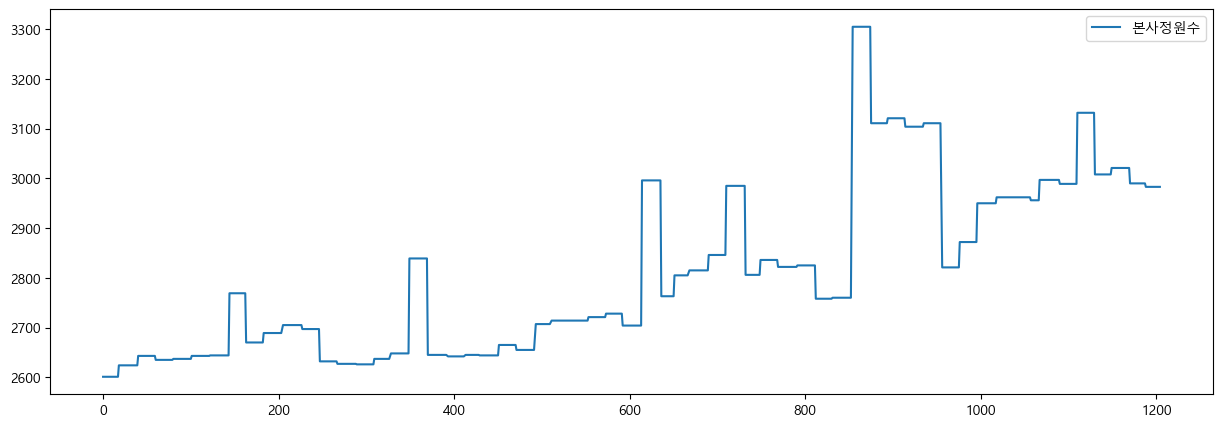

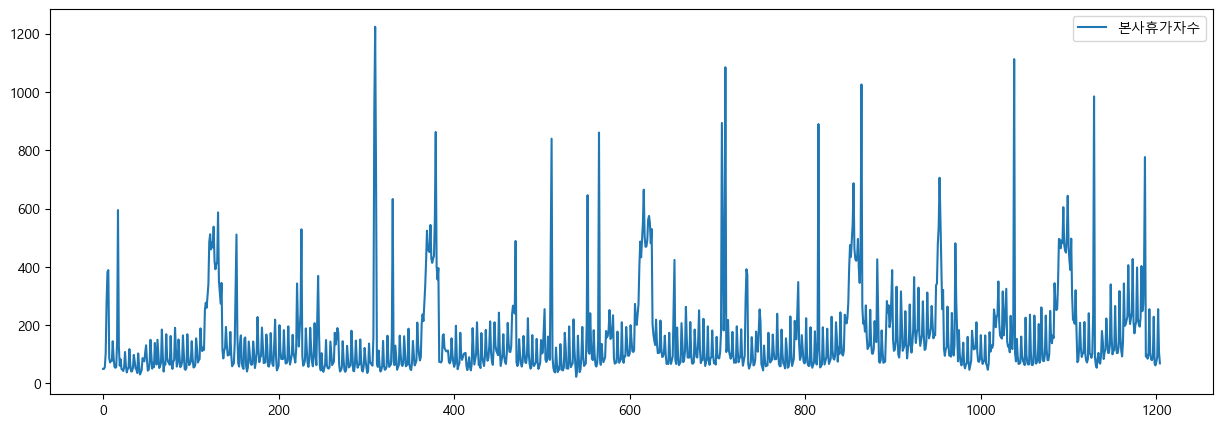

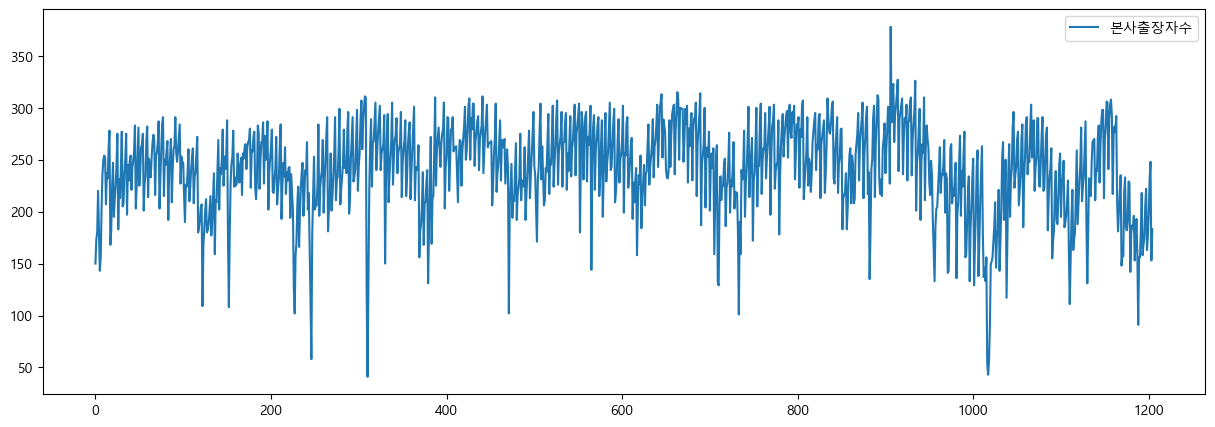

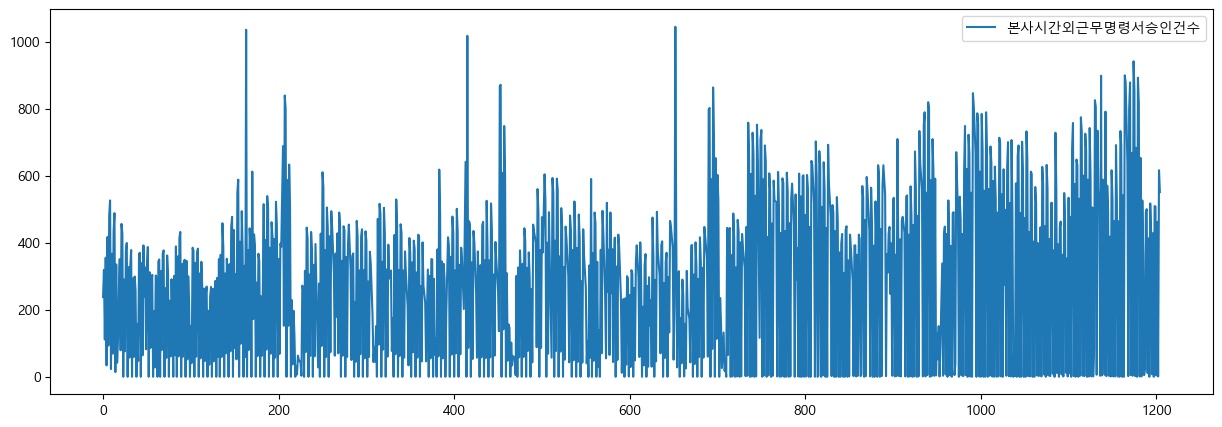

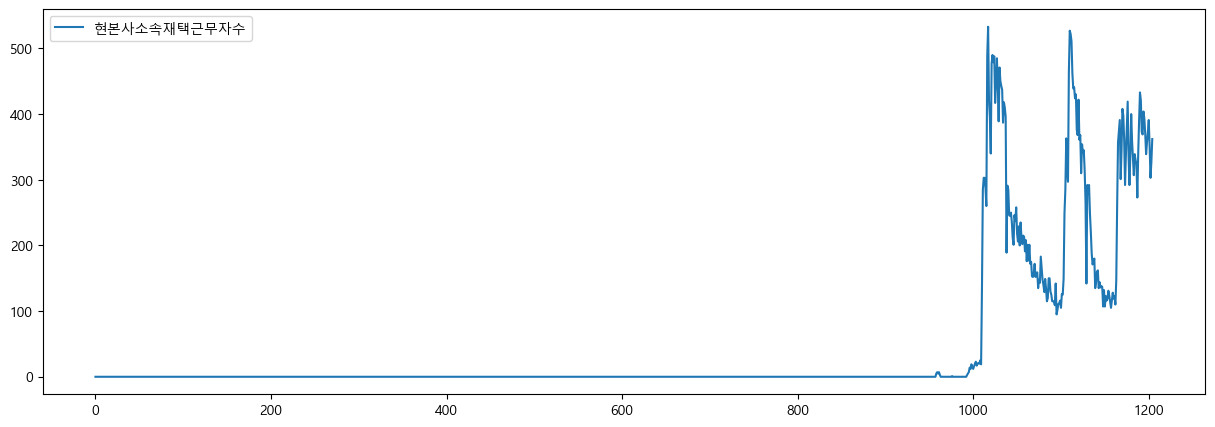

In [138]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 인원 정보 시각화
train[['본사정원수']].plot(figsize=(15,5))
plt.show()

train[['본사휴가자수']].plot(figsize=(15,5))
plt.show()

train[['본사출장자수']].plot(figsize=(15,5))
plt.show()

train[['본사시간외근무명령서승인건수']].plot(figsize=(15,5))
plt.show()

train[['현본사소속재택근무자수']].plot(figsize=(15,5))
plt.show()

- 본사정원수 : 지속적 상승 추세
- 본사휴가자수 : 특정 일자를 전후로 휴가자 급등
- 본사출장자수 : 주기가 일정하지 않지만 상승-하락 패턴
- 본사시간외근무명령서승인건수 : index가 약 700일 때부터 야근하는 사람의 수가 증가, 야근이 아예 없는날(=0)의 수 증가
- 현본사소속재택근무자수 : 특정일 기준으로 재택근무자수 증가

In [139]:
train[train['현본사소속재택근무자수'] > 100]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일
1010,2020-03-20,5,2950,176,263,3,135.0,모닝롤/허니브레드 우유/주스 계란후라이 야채죽/쌀밥 (쌀:국내산) 꽃게탕 (오징어...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 갈비탕 (갈비:호주산) 칠리새우 감자채볶음 ...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 건새우아욱국 치즈함박스테이크 (돈육:국내,수...",627.0,358.0,3,20
1011,2020-03-23,1,2950,109,178,687,285.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국 꽈리고추...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국 오리양념불고기*쌈무 (오리:국내산)...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼 한식...",1110.0,651.0,3,23
1012,2020-03-24,2,2950,131,137,639,303.0,모닝롤/햄치즈샌드 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국 수제어묵볶...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...",오므라이스 (쌀:국내산) 가쯔오장국 돈육고구마강정 (돈육:국내산) 과일플레인샐러드...,1083.0,754.0,3,24
1013,2020-03-25,3,2950,122,146,1,303.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕 감...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국 목살스테이크 (목살:국내산) 파...",찹쌀밥 장각닭죽 생야채*쌈짱 오렌지 하루야채주스 포기김치,1022.0,526.0,3,25
1014,2020-03-26,4,2950,133,133,584,288.0,모닝롤/바나나샌드 우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국 제육볶음 (돈육:국내산) 계란찜 ...","멸치주먹밥 (쌀,현미흑미:국내산) 우동 해물까스*와사비소스 꽃맛살샐러드 무피클...",955.0,645.0,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


재택근무자수의 발생원인을 확인해보니 2020년 3월부터 재택근무자수가 100명이 넘은 것을 볼 수 있다.

시기상 코로나19로 인한 재택근무 전환이 원인인 것으로 보인다.

위에 본사시간외근무명령서승인건수의 값이 0인 부분이 많았기 때문에 0인 날을 요일별로 살펴보겠다.

In [140]:
train[train['본사시간외근무명령서승인건수'] == 0]['요일'].value_counts()

요일
3    148
5     34
Name: count, dtype: int64

수요일(3)과 금요일(5)뿐인 것으로 보아 일종의 '야근 없는 날'이 존재하는 것이다.

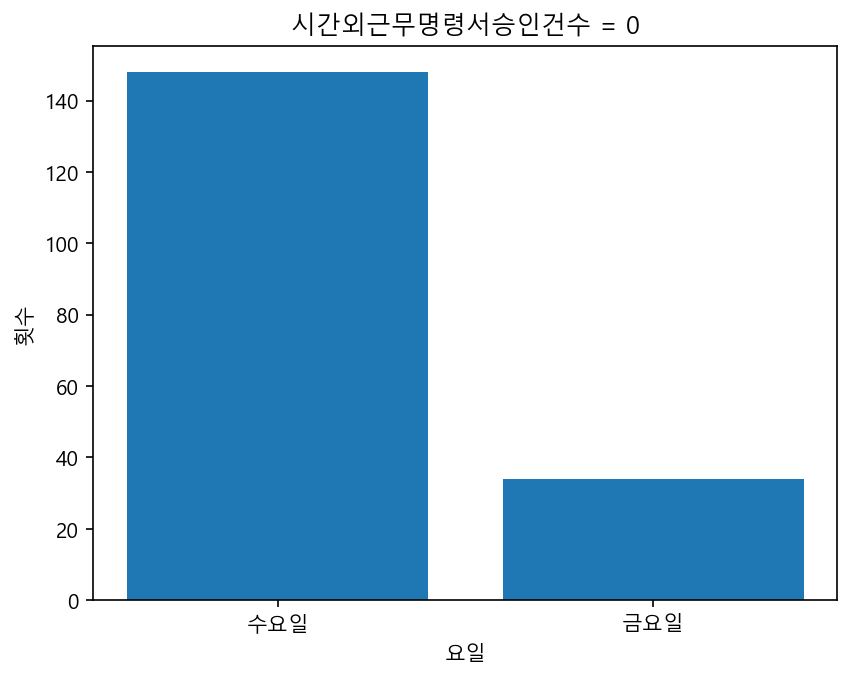

In [141]:
# 요일별 야근 없는 날

x = ['수요일', '금요일']
y = train[train['본사시간외근무명령서승인건수'] == 0].value_counts('요일').values

plt.figure(dpi=150)

plt.title("시간외근무명령서승인건수 = 0")
plt.xlabel('요일')
plt.ylabel('횟수')

plt.bar(x, y)
plt.show()

이제 feature와 target의 상관관계를 알아보자.

아래는 중식계를 기준으로 오름차순 정렬하여 인원 정보를 시각화한 것이다.

시각화를 할 때는 기본적으로 인덱스 정보를 x축으로 사용한다.

따라서 중식계를 기준으로 정렬한 것을 유지하기 위해 reset_index() 메서드를 사용해 새로운 인덱스를 부여하였다.

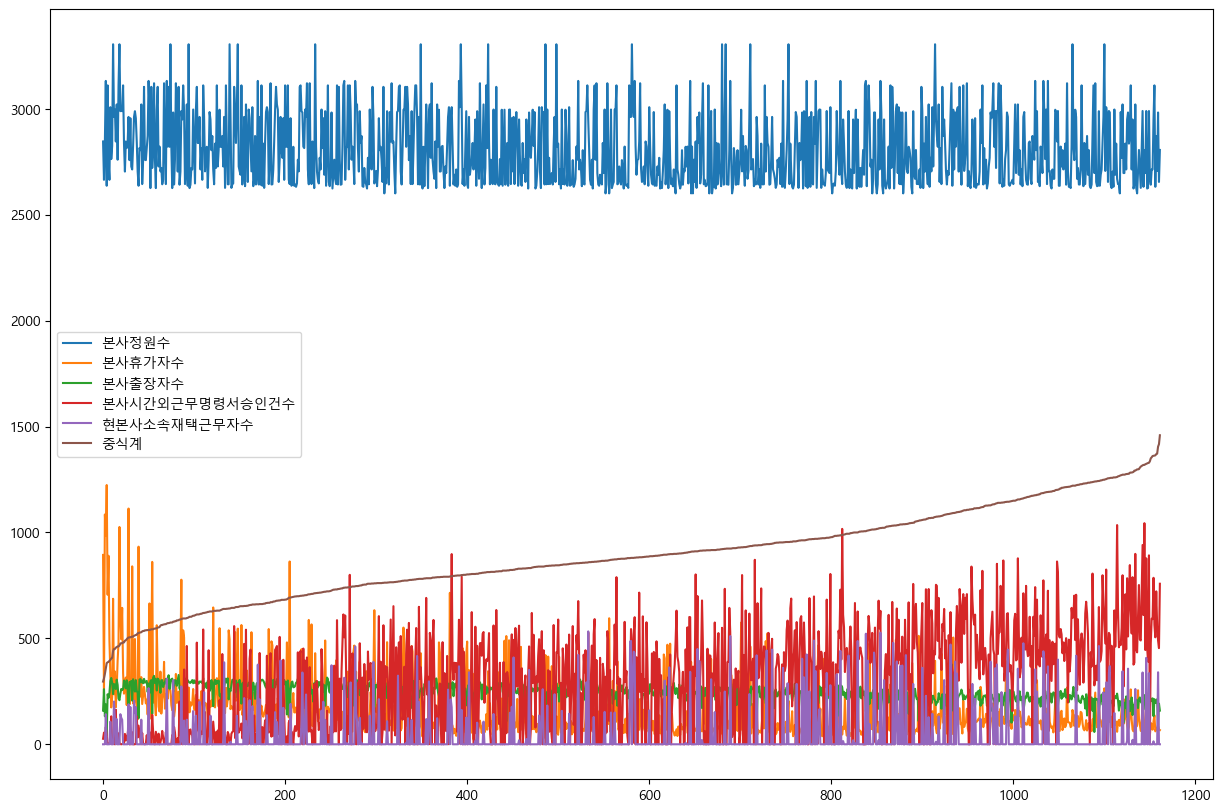

In [142]:
# 중식계 오름차순 기준으로 인원 정보 시각화
train.sort_values(by='중식계')[['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

중식계와 본사출장자수를 시각화하여 두 변수간 관계를 파악해보자.

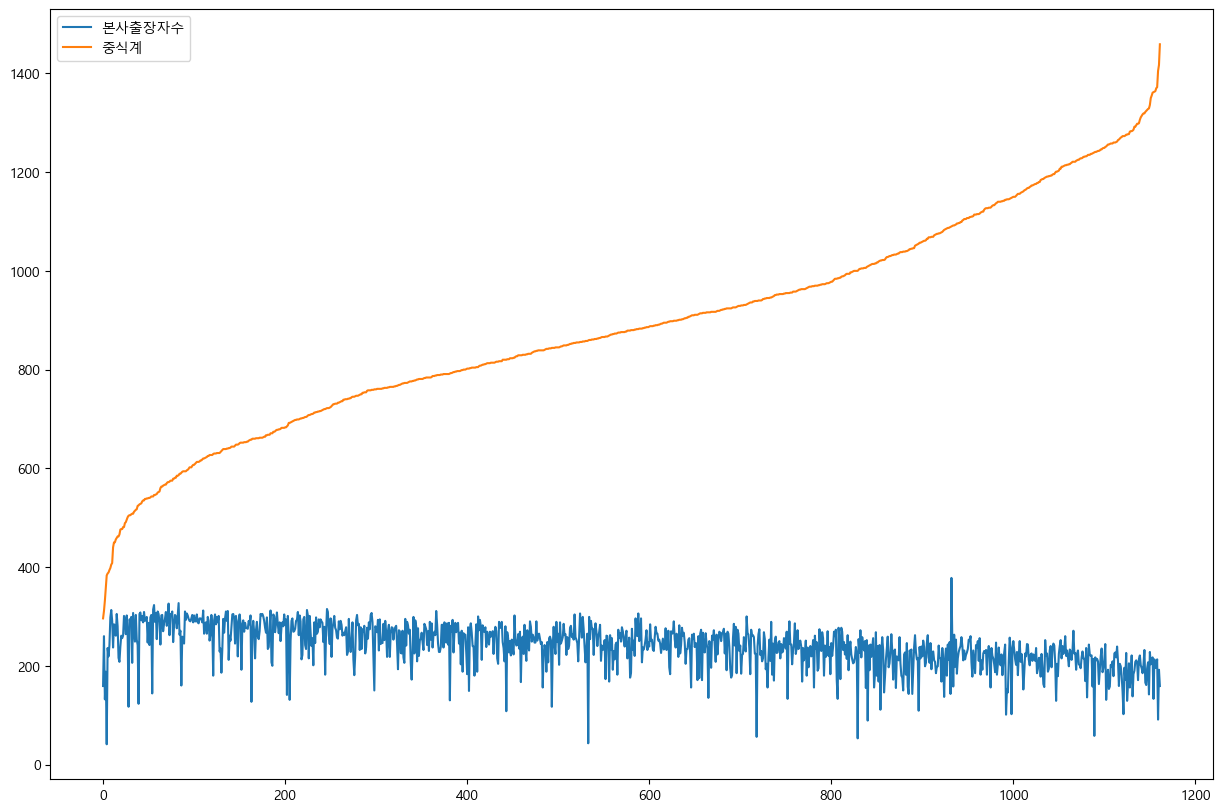

In [143]:
# 중식계 오름차순 기준으로 본사출장자수 시각화
train.sort_values(by='중식계')[['본사출장자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

중식계가 증가할수록 본사출장자수가 감소하는 것이 보인다.

아무래도 출장을 하면 외부에서 식사를 해결하는 경우가 많다보니 당연한 결과이다.

<br>

다음으로 중식계와 본사휴가자수를 시각화해보자

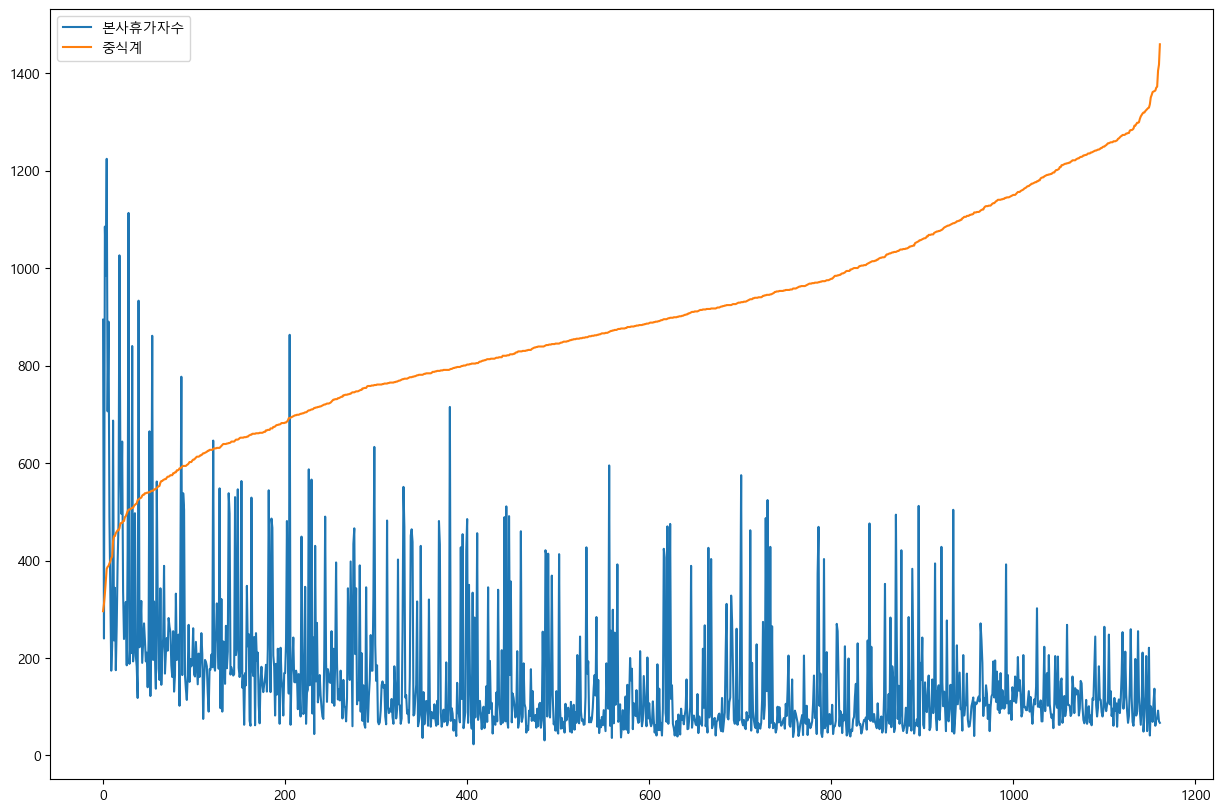

In [144]:
# 중식계 오름차순 기준으로 본사휴가자수 시각화
train.sort_values(by='중식계')[['본사휴가자수', '중식계']].reset_index(drop=True).plot(figsize=(15,10))    
plt.show()

중식계가 증가할수록 본사휴가자수가 감소하는 것이 보인다.

이것도 당연하게 휴가자가 적으면 출근 인원이 많아지니 자연스레 중식계도 증가한다.

<br>
<br>

현재 회사에서 일하고 있는 직원 수를 계산해 현재원이라는 column을 추가해보자

현재원은 본사 정원 수에서 휴가자수, 출장자수, 재택근무자수를 제외하면 된다.

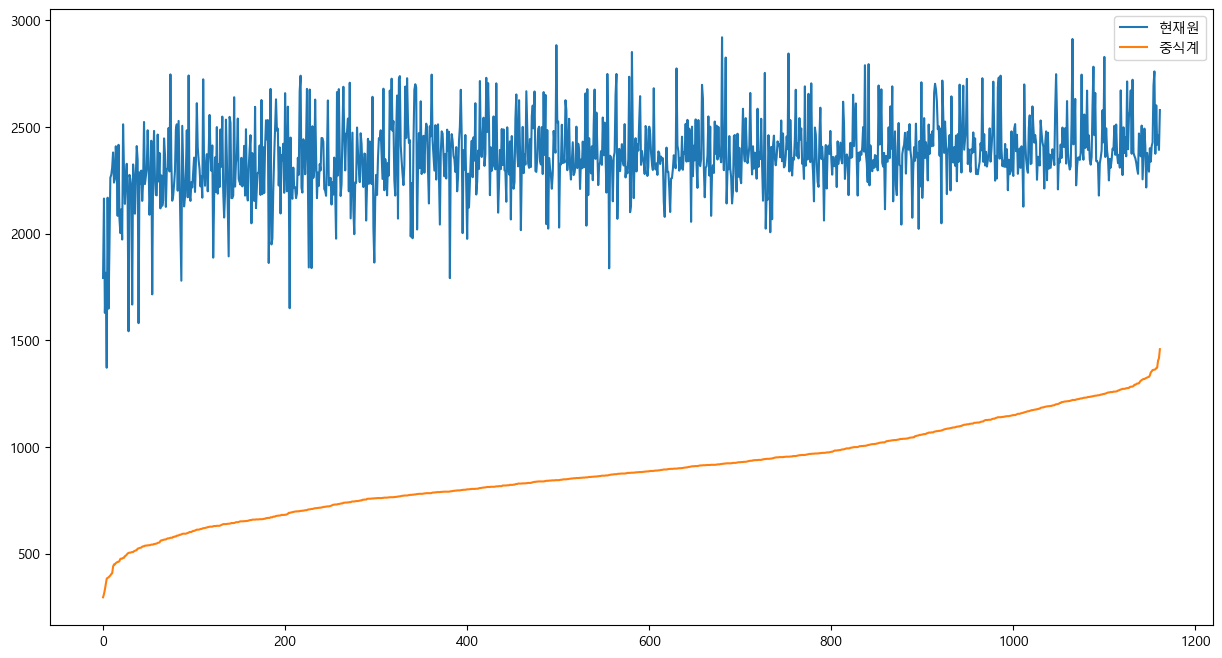

In [145]:
# 현재원 컬럼 추가
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

# 중식계 오름차순 기준으로 현재원 시각화
train.sort_values(by='중식계')[['현재원', '중식계']].reset_index(drop=True).plot(figsize=(15,8))
plt.show()

현재원 column은 중식계와 유사한 기울기로 증가하는 형태를 보인다.

중식계와 직접적으로 연관된 만큼 현재원 column을 분석에 사용하면 될 것 같다.

<br>
<br>

중식계와 마찬가지로 석식계 또한 인원 정보를 시각화해보자.

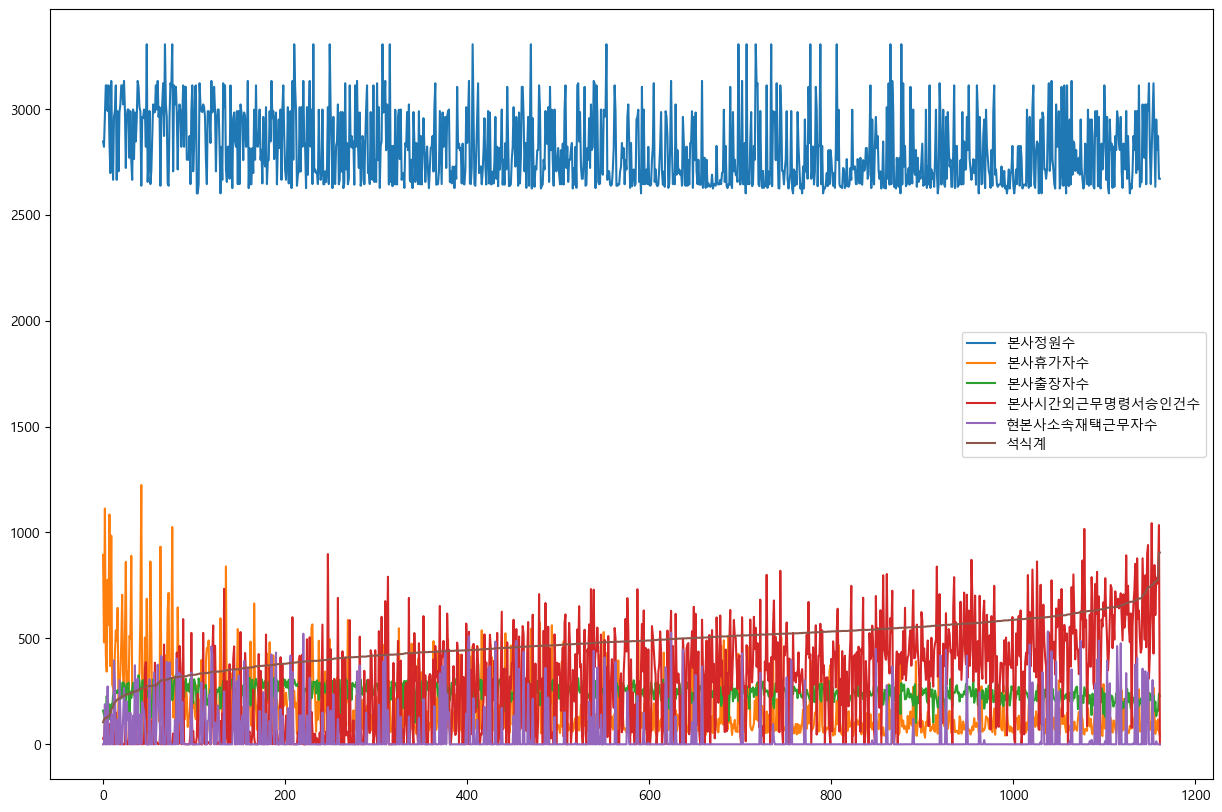

In [146]:
# 석식계 오름차순 기준으로 인원 정보 시각화
train.sort_values(by='석식계')[['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '석식계']].reset_index(drop=True).plot(figsize=(15,10))    
plt.show()

본사정원수는 중식계에서도 그랬듯이 석식계와도 관계가 없는 것으로 보인다.

본사정원수 column은 제거하는 것이 모델 성능 향상에 조금 도움이 될 것 같다.

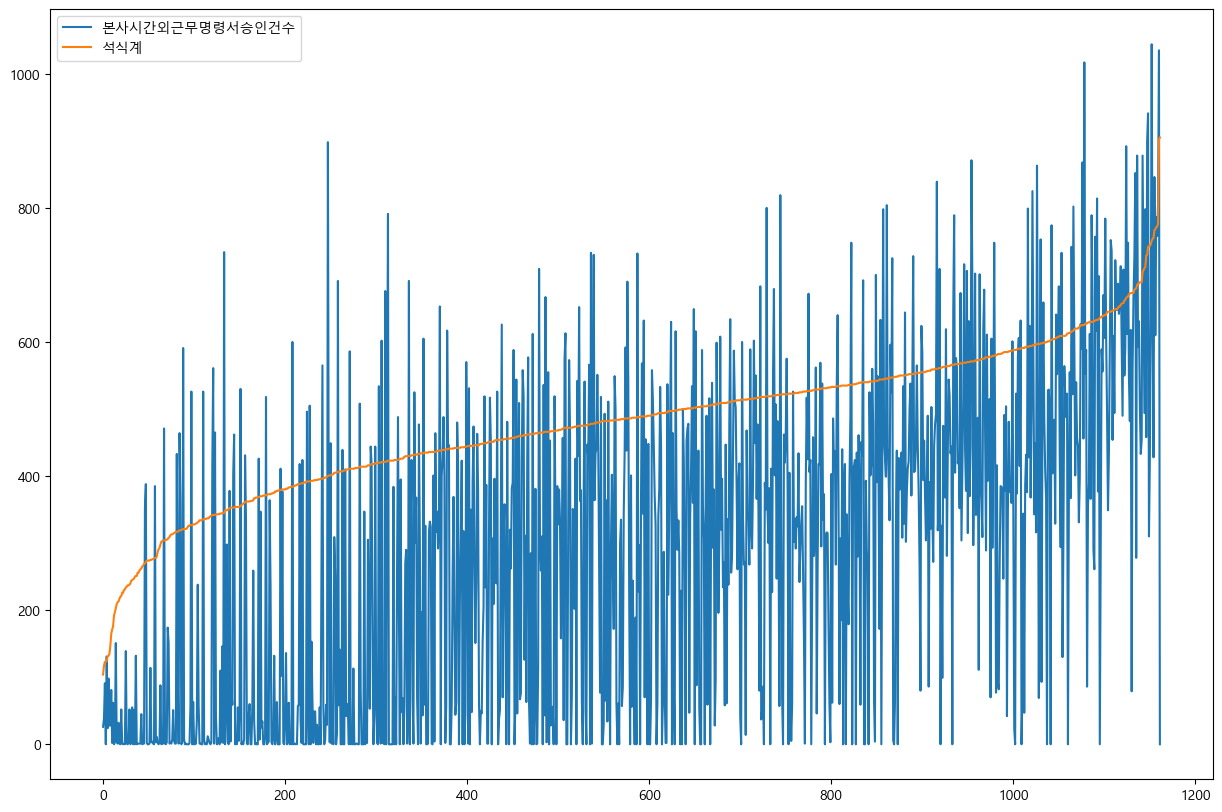

In [147]:
# 석식계 오름차순 기준으로 본사시간외근무명령서승인건수 시각화
train.sort_values(by='석식계')[['본사시간외근무명령서승인건수', '석식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

본사시간외근무명령서승인건수 = 야근.

야근인원이 증가할수록 석식계가 증가한다.

다음으로 아까 새로 추가한 현재원 column도 석식계와 관계가 있는지 시각화하여 살펴보자.

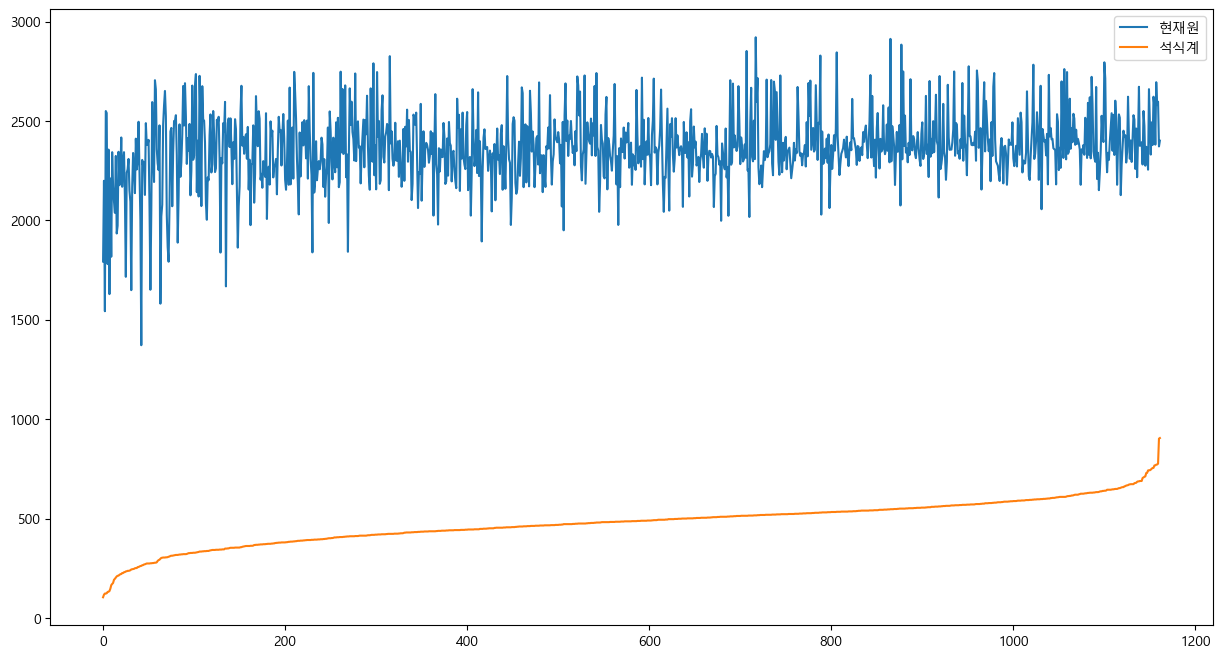

In [148]:
## 현재원 정보
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

# 석식계 오름차순 기준으로 현재원 시각화
train.sort_values(by='석식계')[['현재원', '석식계']].reset_index(drop=True).plot(figsize=(15,8))
plt.show()

석식계 또한 현재원과 유사한 기울기로 증가하는 것으로 보아 현재원 column을 분석에 사용하는 것은 유의미할 것이라 생각된다.

<br>
<br>

이제 프로젝트 데이터의 Target인 중식계와 석식계간의 관계도 살펴봐야할 것이다.

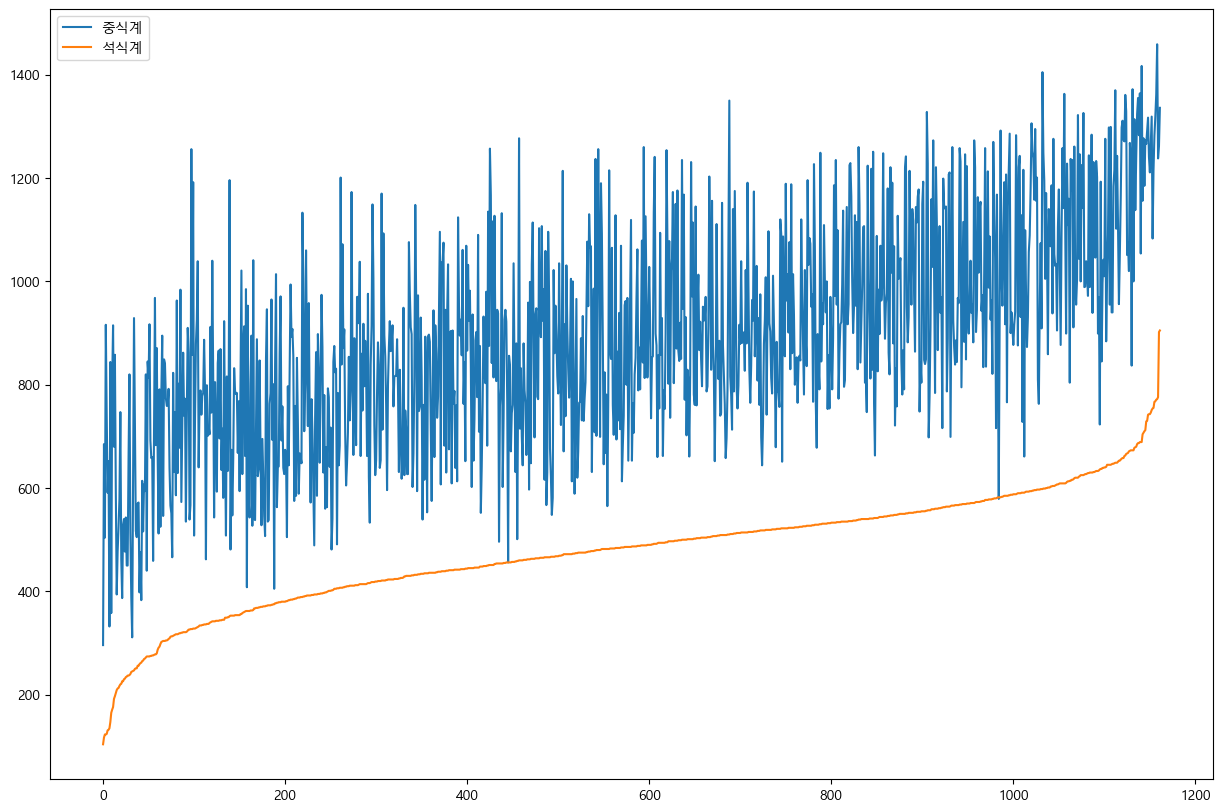

In [149]:
# 석식계 오름차순 기준으로 중식계 시각화
train.sort_values(by='석식계')[['중식계', '석식계']].reset_index(drop=True).plot(figsize=(15,10))
plt.show()

위 그래프를 보아 중식계와 석식계는 비례 관계로 볼 수 있다.

<br>
<br>

Target을 중심으로 한 EDA를 통해 도출해 낸 인사이트는 다음과 같다.
- 본사 정원수 : Target과 관계가 없지만, 현재원을 계산할 때 쓰일 수 있다.
- 중식계와 본사휴가자수, 본사출장자수는 반비례 관계
- 석식계와 시간외근무(=야근)자수는 비례 관계
- 중식계와 석식계는 비례 관계

전처리를 진행해보자.

In [150]:
train['현재원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,현재원
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1,2401.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2,2378.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3,2365.0
3,2016-02-04,4,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4,2277.0
4,2016-02-05,5,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5,2142.0


Target과 관계가 없었던 본사정원수 column은 데이터프레임에서 제거해준다.

In [151]:
train = train.drop('본사정원수', axis = 1)
train.head()

,일자,요일,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,현재원
0,2016-02-01,1,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1,2401.0
1,2016-02-02,2,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2,2378.0
2,2016-02-03,3,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3,2365.0
3,2016-02-04,4,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4,2277.0
4,2016-02-05,5,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5,2142.0


In [152]:
# 현재원 컬럼 추가
test['현재원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

# 본사정원수 컬럼 삭제
test = test.drop('본사정원수', axis = 1)

모델링 하기에 앞서, 독립변수와 종속변수를 설정해야 한다.

Target은 중식계와 석식계이므로 train data에서 학습에 사용할 독립변수와 예측할 종속변수(중식계와 석식계)를 분리할 것이다.

따라서 중식계를 중식 예측의 종속변수로, 석식계를 석식 예측의 종속변수로 설정하게 된다.

In [153]:
# 중식계 변수 할당
lunch_count = train['중식계']

# 석식계 변수 할당
dinner_count = train['석식계']

독립변수에는 종속변수인 중식계와 석식계를 제외한 나머지 column이 올 수 있다.

features 리스트에 독립변수로 설정해야하는 column을 저장하고 X에 할당한다.

In [154]:
# 독립변수 X 할당
features = ['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']   
X = train[features]

# 독립변수 X 데이터 살펴보기
X.head()

,요일,월,일,현재원,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,2,1,2401.0,50,150,238,0.0
1,2,2,2,2378.0,50,173,319,0.0
2,3,2,3,2365.0,56,180,111,0.0
3,4,2,4,2277.0,104,220,355,0.0
4,5,2,5,2142.0,278,181,34,0.0


# 모델링

RandomForest는 훈련 과정에서 다수의 의사결정나무를 생성하고 각각의 의사결정나무로부터 나온 분류 결과를 집계하여 최종적으로 분류된 데이터 또는 평균 예측치를 출력하는 모델이다.

RandomForest는 앙상블 모델로 앙상블은 단일 모델보다 더 높은 예측 성능과 일반화 능력을 제공하기 위해 여러 개의 모델을 함께 사용하는 것이다.

배깅이라는 앙상블 기법을 기반으로, 배깅은 train data를 임의로 추출하여 복원 추출(Bootstrap Sampling)을 통해 부분집합을 생성하고, 각각의 부분집합에서 독립적으로 모델을 학습시킨다. 이 때, 복원 추출 방법은 중복을 허용하기 때문에 단일데이터가 여러 번 선택될 수 있다.

다수의 나무들로부터 특징을 무작위로 선정하여 집계하는 만큼 **과적합을 피할 수 있다.**

In [155]:
from sklearn.ensemble import RandomForestRegressor

# 모델 정의
lunch_model = RandomForestRegressor()

In [156]:
# 중식계 예측을 위한 features
features = ['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train['중식계']

# 모델 학습
lunch_model.fit(X, y)

RandomForestRegressor()

In [157]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
lunch_predict = lunch_model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(lunch_predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1004.63  981.21  574.21 1209.88 1023.15 1020.35  965.93  659.11 1302.51
 1035.29]


중식계 예측값이 담겨 있는 lunch_predict를 사용해 선 그래프를 그리면 RandomForest모델의 예측 결과의 추이를 직관적으로 확인할 수 있다.

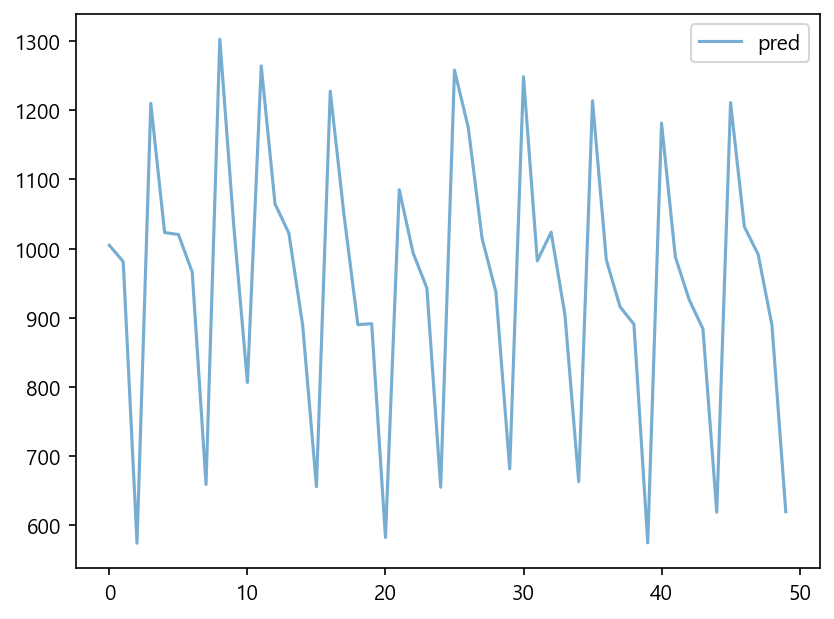

In [158]:
# randomforest 중식계 예측값 시각화
plt.figure(dpi=150)
plt.plot(lunch_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

estimators_ 속성을 사용하면 모델에 사용된 각각의 DecisionTree를 확인할 수 있다.

개별 DecisionTree를 확인함으로써 분류 규칙을 분석하거나, 예측 결과를 설명할 수 있다.

In [159]:
estimator_list = lunch_model.estimators_
estimator_list

[DecisionTreeRegressor(max_features=1.0, random_state=338457594),
 DecisionTreeRegressor(max_features=1.0, random_state=1463958895),
 DecisionTreeRegressor(max_features=1.0, random_state=1247539062),
 DecisionTreeRegressor(max_features=1.0, random_state=988823618),
 DecisionTreeRegressor(max_features=1.0, random_state=585154848),
 DecisionTreeRegressor(max_features=1.0, random_state=689565064),
 DecisionTreeRegressor(max_features=1.0, random_state=931075616),
 DecisionTreeRegressor(max_features=1.0, random_state=773710700),
 DecisionTreeRegressor(max_features=1.0, random_state=2073347338),
 DecisionTreeRegressor(max_features=1.0, random_state=2026140462),
 DecisionTreeRegressor(max_features=1.0, random_state=1750714505),
 DecisionTreeRegressor(max_features=1.0, random_state=1020549560),
 DecisionTreeRegressor(max_features=1.0, random_state=1919201451),
 DecisionTreeRegressor(max_features=1.0, random_state=1332817177),
 DecisionTreeRegressor(max_features=1.0, random_state=191752060),
 D

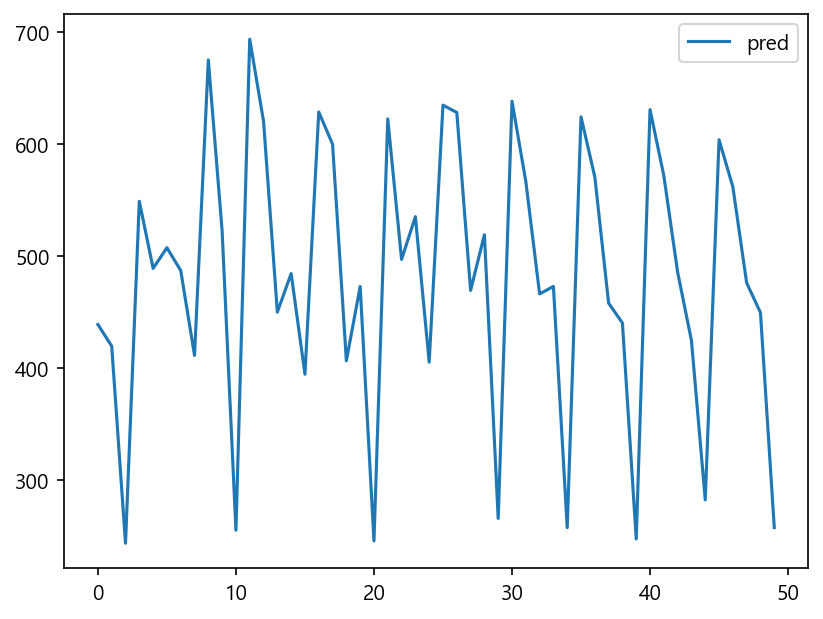

In [160]:
# 석식계 예측을 위한 features    
features.append('중식계')

# test 데이터에 중식계 컬럼 추가 (예측값)    
test['중식계'] = lunch_predict

# 독립변수 X와 종속변수 y 업데이트    
X = train[features]    
y = train['석식계']    

# 1. 모델 정의    
dinner_model = RandomForestRegressor()    

# 2. 모델 학습    
dinner_model.fit(X,y)

# 3. 예측      
dinner_predict = dinner_model.predict(test[features])

# 예측값 시각화    
plt.figure(dpi=150)    
plt.plot(dinner_predict, label='pred')    
plt.legend()    
plt.show()    

<br>
<br>

LinearRegression란, 예측하고자 하는 종속변수 y와 독립변수 x의 관계를 가장 잘 나타내는 Line(선)을 구하는 회귀 분석 방법이다.

이 LinearRegression 모델은 regression coefficient(회귀 계수)를 선형 결합으로 표현할 수 있는 모델을 말한다.

LinearRegression모델은 주로 수치 예측 문제에 사용된다.

선형 회귀 분석을 통해 x와 y의 관계를 확인할 수 있으며 새로운 X값이 등장했을 때에도 그 X값에 해당하는 y값이 어디쯤에 위치할 지 예측할 수 있게 된다.

즉, 독립변수 X를 이용해 수치형 종속변수 y를 예측할 수 있게 되는 것이다.

선형 모델은 파라미터가 선형식으로 표현하기 때문에 유연성이 떨어지지만,

파라미터를 추정하거나 모델을 해석할 때 비선형 모델에 비해 유리하다는 특징이 있다.

In [161]:
from sklearn.linear_model import LinearRegression

# 모델 정의
lunch_model = LinearRegression()

In [162]:
# 중식계 예측을 위한 features
features = ['요일', '월', '일', '현재원', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']

# 독립변수 X와 종속변수 y 업데이트
X = train[features]
y = train['중식계']

# 모델 학습
lunch_model.fit(X, y)

LinearRegression()

In [163]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
lunch_predict = lunch_model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(lunch_predict[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 958.55656265  872.63557269  612.45852737 1203.6561516  1101.41479979
  977.00597347  938.90038459  695.47184055 1184.34754718 1089.3143157 ]


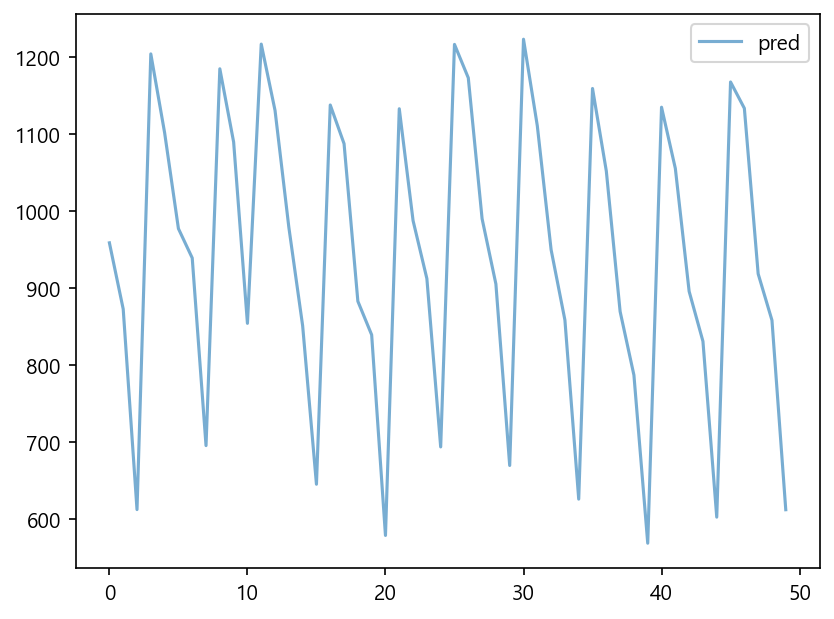

In [164]:
# 예측값 시각화
plt.figure(dpi=150)
plt.plot(lunch_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

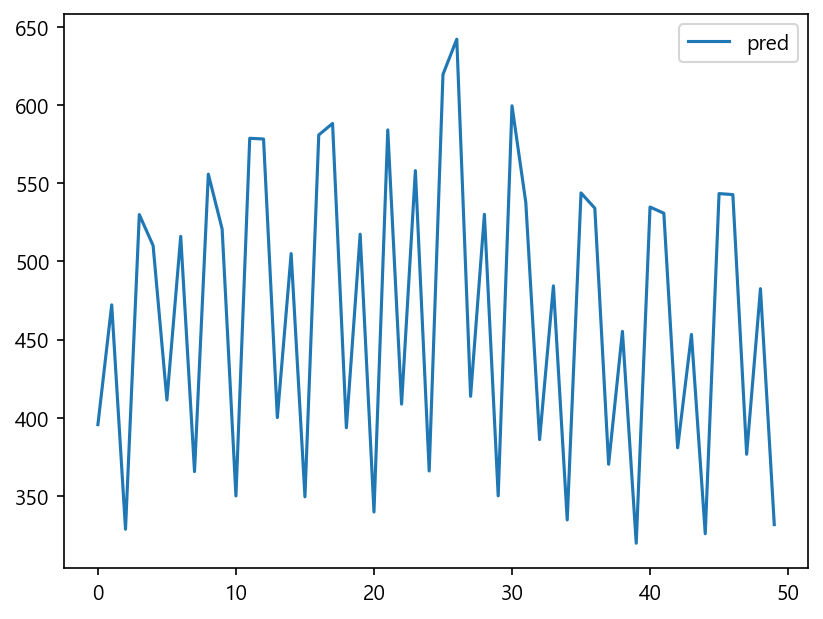

In [165]:
# 석식계 예측을 위한 features    
features.append('중식계')    

# test 데이터에 중식계 컬럼 추가 (예측값)    
test['중식계'] = lunch_predict    

# 독립변수 X와 종속변수 y 업데이트    
X = train[features]    
y = train['석식계']    

# 1. 모델 정의    
dinner_model = LinearRegression()    

# 2. 모델 학습      
dinner_model.fit(X,y)    

# 3. 예측      
dinner_predict = dinner_model.predict(test[features])    

# 예측값 시각화    
plt.figure(dpi=150)    
plt.plot(dinner_predict, label='pred')    
plt.legend()    
plt.show()    

# 하이퍼 파라미터 튜닝

하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해 주는 값을 뜻한다.

여기서는 `n_estimators`와 `criterion`을 다룰 것인데 `n_estimators`는 결정트리의 개수를 지정하며 default값은 10이다. `criterion`은 분할된 것(split)의 품질을 측정하는 기능이다.

`max_depth`로 트리의 최대 깊이를 지정할 수 있으며, `min_samples_split`으로 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정할 수도 있다.

하이퍼 파라미터는 정해진 최적의 값이 존재하지 않고, 하이퍼 파라미터 설정에 따라 성능 변화에 큰 차이를 보인다.

하이퍼 파라미터와 혼용되는 파라미터(매개변수)는 학습 과정에서 생성되는 변수로 모델 혹은 데이터에 결정되는 것이다.

하이퍼 파라미터를 튜닝함으로써 모델 성능을 향상시킬 수 있고 모델의 복잡도를 제어하여 과적합을 방지하는 등의 이점을 가지고 있다.

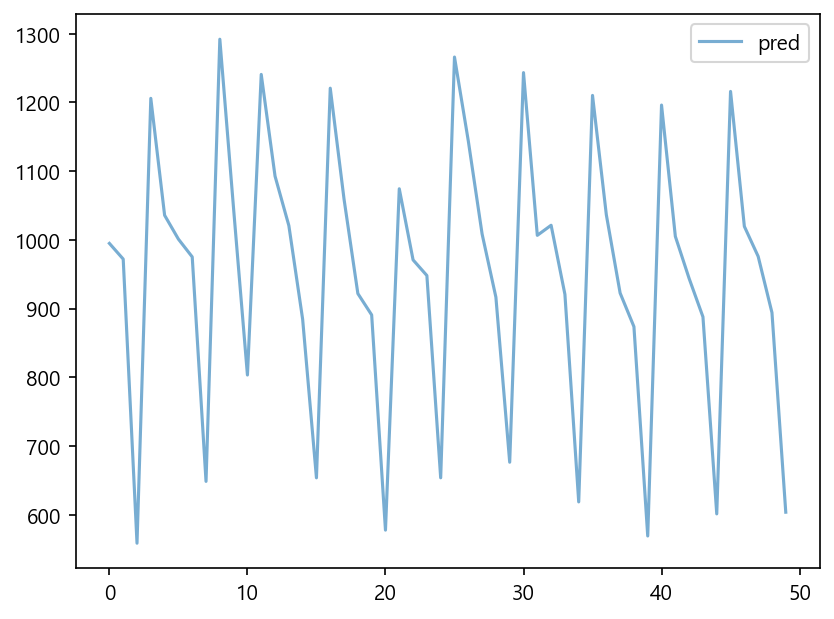

In [166]:
# 하이퍼 파라미터 튜닝 - 성능 업

# 중식계 예측을 위한 features    
features = features[:-1]

# 독립변수 X와 종속변수 y 업데이트    
X = train[features]    
y = train['중식계']

from sklearn.ensemble import RandomForestRegressor    

# 1. 모델 정의    
lunch_model = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

# 2. 모델 학습    
# fit() 메소드 이용    
lunch_model.fit(X,y)

# 3. 예측    
# predict() 메소드 이용    
lunch_count_predict = lunch_model.predict(test[features])

# 예측값 시각화     
plt.figure(dpi=150)    
plt.plot(lunch_count_predict, alpha=0.6, label='pred')    
plt.legend()    
plt.show()

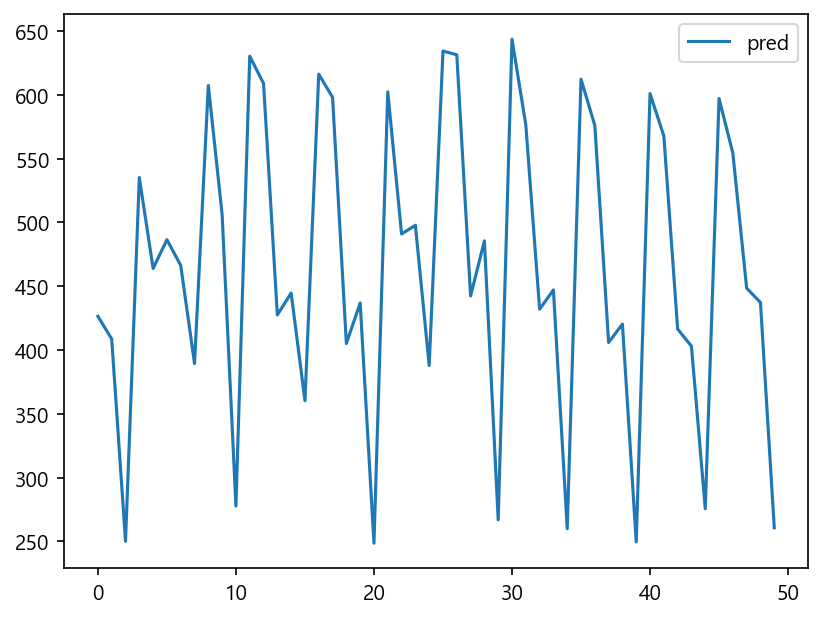

In [167]:
# 석식계 예측을 위한 features    
features.append('중식계')

# test 데이터에 중식계 컬럼 추가 (예측값)    
test['중식계'] = lunch_predict

# 독립변수 X와 종속변수 y 업데이트    
X = train[features]    
y = train['석식계']

# 1. 모델 정의    
dinner_model = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

# 2. 모델 학습    
# fit() 메소드 이용    
dinner_model.fit(X,y)

# 3. 예측    
# predict() 메소드 이용    
dinner_predict = dinner_model.predict(test[features])

# 예측값 시각화    
plt.figure(dpi=150)    
plt.plot(dinner_predict, label='pred')    
plt.legend()    
plt.show()

In [168]:
submission['중식계'] = lunch_predict        
submission['석식계'] = dinner_predict

In [169]:
submission.to_csv('submission.csv', index=False)